In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 17.1 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
#ToDownload market data from Yahoo! Finance's API, Yahoo!, Y!Finance, and Yahoo! finance are registered trademarks of Yahoo, Inc.
import yfinance as yf 
import pywt
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
#define the ticker symbol
tickerSymbol = 'MSFT'

In [3]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
print(type(msft.info))

<class 'dict'>


In [4]:
stockinfo = msft.info
for key,value in stockinfo.items():
  print(key,":",value)

zip : 98052-6399
sector : Technology
fullTimeEmployees : 181000
longBusinessSummary : Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certification on Microsof

In [5]:
# get historical market data
hist = msft.history(period="max")

In [6]:
# show actions (dividends, splits)
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2020-11-18,0.56,0.0
2021-02-17,0.56,0.0
2021-05-19,0.56,0.0


In [7]:
# show dividends
msft.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2020-11-18    0.56
2021-02-17    0.56
2021-05-19    0.56
2021-08-18    0.56
2021-11-17    0.62
Name: Dividends, Length: 72, dtype: float64

In [8]:
# show splits
msft.splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

In [9]:
# show financials
msft.financials
msft.quarterly_financials

,2021-12-31,2021-09-30,2021-06-30,2021-03-31
Research Development,5758000000.0,5599000000.0,5687000000.0,5204000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,22515000000.0,20524000000.0,19405000000.0,17236000000.0
Minority Interest,None,None,None,None
Net Income,18765000000.0,20505000000.0,16458000000.0,15457000000.0
Selling General Administrative,6763000000.0,5834000000.0,7379000000.0,6409000000.0
Gross Profit,34768000000.0,31671000000.0,32161000000.0,28661000000.0
Ebit,22247000000.0,20238000000.0,19095000000.0,17048000000.0
Operating Income,22247000000.0,20238000000.0,19095000000.0,17048000000.0
Other Operating Expenses,None,None,None,None


In [10]:
# show major holders
msft.major_holders

,0,1
0,0.06%,% of Shares Held by All Insider
1,71.94%,% of Shares Held by Institutions
2,71.99%,% of Float Held by Institutions
3,5551,Number of Institutions Holding Shares


In [11]:
# show institutional holders
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",613781686,2021-09-29,0.0819,173037332917
1,Blackrock Inc.,507117032,2021-09-29,0.0676,142966433661
2,State Street Corporation,294432926,2021-09-29,0.0393,83006530497
3,"FMR, LLC",215731468,2021-09-29,0.0288,60819015458
4,Price (T.Rowe) Associates Inc,197579453,2021-09-29,0.0264,55701599389
5,"Geode Capital Management, LLC",126079812,2021-09-29,0.0168,35544420599
6,Capital World Investors,110359787,2021-09-29,0.0147,31112631151
7,Capital Research Global Investors,94282634,2021-09-29,0.0126,26580160177
8,Capital International Investors,91901445,2021-09-29,0.0123,25908855374
9,Northern Trust Corporation,88410999,2021-12-30,0.0118,29734387183


In [12]:
# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

,2021-12-31,2021-09-30,2021-06-30,2021-03-31
Intangible Assets,7.462000e+09,7.794000e+09,7.800000e+09,8.127000e+09
Total Liab,1.803790e+11,1.834400e+11,1.917910e+11,1.743740e+11
Total Stockholder Equity,1.600100e+11,1.519780e+11,1.419880e+11,1.345050e+11
Other Current Liab,4.634600e+10,5.262200e+10,5.261200e+10,4.006900e+10
Total Assets,3.403890e+11,3.354180e+11,3.337790e+11,3.088790e+11
Common Stock,8.452800e+10,8.375100e+10,8.311100e+10,8.230800e+10
Other Current Assets,1.230100e+10,1.298200e+10,1.347100e+10,1.203400e+10
Retained Earnings,7.504500e+10,6.694400e+10,5.705500e+10,5.073500e+10
Other Liab,3.058400e+10,3.015700e+10,3.168100e+10,3.160100e+10
Good Will,5.092100e+10,5.045500e+10,4.971100e+10,4.969800e+10


In [13]:
# show cashflow
msft.cashflow
msft.quarterly_cashflow

,2021-12-31,2021-09-30,2021-06-30,2021-03-31
Investments,5.643000e+09,4.183000e+09,-4.334000e+09,2.517000e+09
Change To Liabilities,-4.108000e+09,-3.356000e+09,1.301400e+10,3.600000e+08
Total Cashflows From Investing Activities,-1.161000e+09,-3.250000e+09,-1.085300e+10,-9.684000e+09
Total Cash From Financing Activities,-1.198600e+10,-1.627600e+10,-1.137100e+10,-1.319200e+10
Change To Operating Activities,1.760000e+09,-3.551000e+09,7.990000e+08,1.305000e+09
Issuance Of Stock,2.910000e+08,6.120000e+08,4.500000e+08,3.960000e+08
Net Income,1.876500e+10,2.050500e+10,1.645800e+10,1.545700e+10
Change In Cash,1.439000e+09,4.941000e+09,5.220000e+08,-7.300000e+08
Repurchase Of Stock,-7.433000e+09,-7.684000e+09,-7.177000e+09,-6.930000e+09
Effect Of Exchange Rate,1.060000e+08,-7.300000e+07,3.600000e+07,-3.300000e+07


In [14]:
# show earnings
msft.earnings
msft.quarterly_earnings

,Revenue,Earnings
Quarter,,
1Q2021,41706000000,15457000000
2Q2021,46152000000,16458000000
3Q2021,45317000000,20505000000
4Q2021,51728000000,18765000000


In [15]:
# show sustainability
msft.sustainability

,Value
2021-9,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,8.06
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [16]:
# show analysts recommendations
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2022-01-26 14:06:23,BMO Capital,Outperform,,main
2022-01-26 14:42:40,Oppenheimer,Outperform,,main
2022-01-26 15:03:00,Morgan Stanley,Overweight,,main


In [17]:
# show next event (earnings, etc)
msft.calendar

,0,1
Earnings Date,2022-04-25 10:59:00,2022-04-29 12:00:00
Earnings Average,2.19,2.19
Earnings Low,2.14,2.14
Earnings High,2.29,2.29
Revenue Average,49054700000,49054700000
Revenue Low,48652000000,48652000000
Revenue High,49719000000,49719000000


In [18]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

'-'

In [19]:
# show options expirations
msft.options

('2022-02-11',
 '2022-02-18',
 '2022-02-25',
 '2022-03-04',
 '2022-03-11',
 '2022-03-18',
 '2022-03-25',
 '2022-04-14',
 '2022-05-20',
 '2022-06-17',
 '2022-07-15',
 '2022-08-19',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16',
 '2024-01-19')

In [20]:
# show news
msft.news

[{'link': 'https://finance.yahoo.com/news/ken-fisher-sold-10-stocks-204615719.html',
  'providerPublishTime': 1644525975,
  'publisher': 'Insider Monkey',
  'title': 'Ken Fisher Sold These 10 Stocks Before Entering 2022',
  'type': 'STORY',
  'uuid': '693e8a1b-1aae-34cc-941b-d73f381e0c8f'},
 {'link': 'https://finance.yahoo.com/news/morgan-stanley-pounds-table-microsoft-202921663.html',
  'providerPublishTime': 1644524961,
  'publisher': 'TipRanks',
  'title': 'Morgan Stanley Pounds the Table on Microsoft Stock',
  'type': 'STORY',
  'uuid': 'bd4a8ac1-1a9a-3d8e-b42f-eb36c20bdad6'},
 {'link': 'https://finance.yahoo.com/m/de0debef-5f43-3161-8736-1f1d923d2fd6/if-your-job-doesn%E2%80%99t-give-you.html',
  'providerPublishTime': 1644522180,
  'publisher': 'MarketWatch',
  'title': 'If your job doesn’t give you purposeful work, you owe it to yourself to join the ‘Great Reshuffle’',
  'type': 'STORY',
  'uuid': 'de0debef-5f43-3161-8736-1f1d923d2fd6'},
 {'link': 'https://finance.yahoo.com/m/c56

In [22]:
import yfinance as yf
import pywt
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
#define the ticker symbol
tickerSymbol = 'MSFT'

In [30]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25')

In [31]:
print(tickerDf.shape)

(2532, 7)


In [32]:
print(tickerDf.head())

                 Open       High        Low  ...    Volume  Dividends  Stock Splits
Date                                         ...                                   
2010-01-04  23.650098  24.020837  23.626926  ...  38409100        0.0             0
2010-01-05  23.827746  24.020840  23.665547  ...  49749600        0.0             0
2010-01-06  23.850915  24.005391  23.572861  ...  58182400        0.0             0
2010-01-07  23.657823  23.711890  23.317979  ...  50559700        0.0             0
2010-01-08  23.387489  23.850912  23.356593  ...  51197400        0.0             0

[5 rows x 7 columns]


In [34]:
composite_signal =  tickerDf['Close'].values
composite_signal

array([ 23.90498161,  23.91270638,  23.76595497, ..., 162.6000824 ,
       163.60099792, 161.9524231 ])

In [36]:
print(composite_signal.shape)

(2532,)


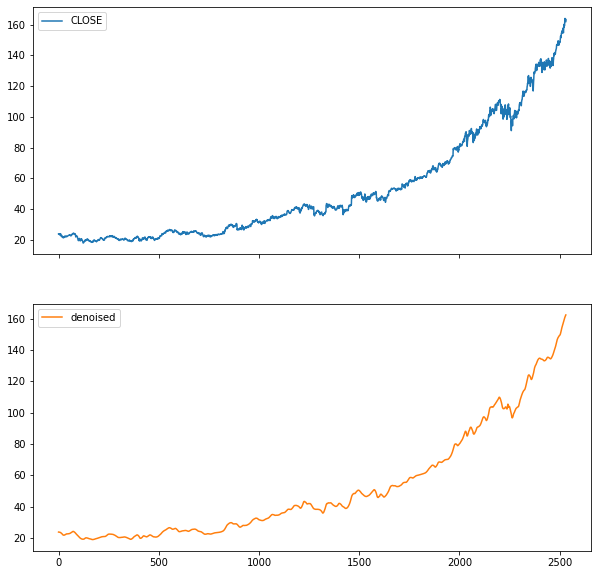

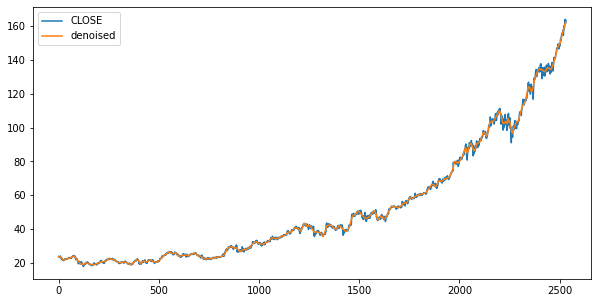

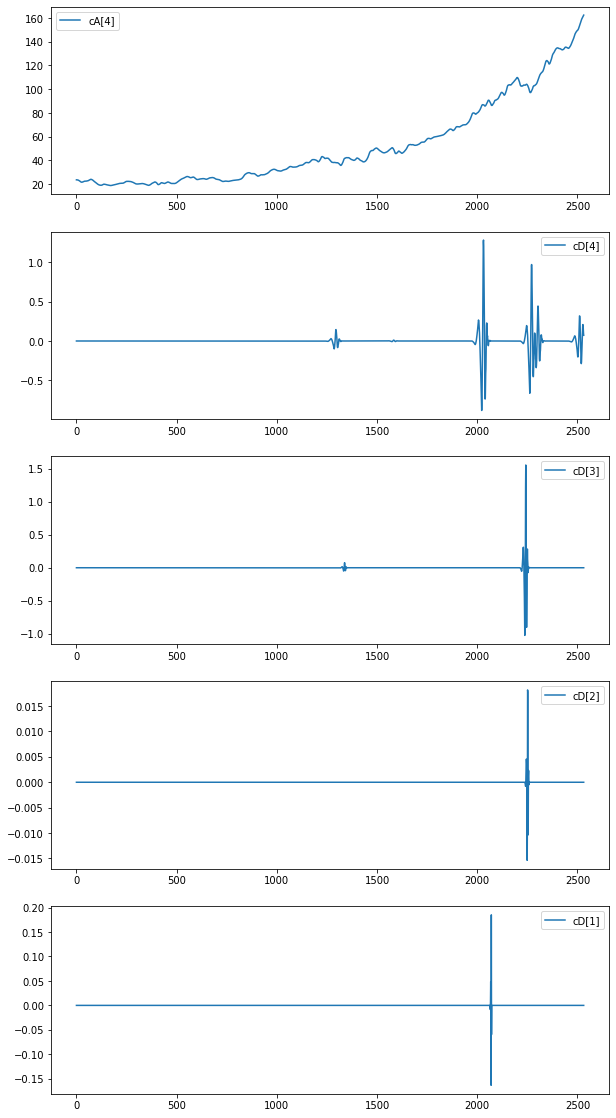

In [29]:
def filter_bank(index_list, wavefunc='db4', lv=4, m=1, n=4, plot=False):
    
    '''
    WT: Wavelet Transformation Function
    index_list: Input Sequence;
   
    lv: Decomposing Level；
 
    wavefunc: Function of Wavelet, 'db4' default；
    
    m, n: Level of Threshold Processing
   
    '''
   
    # Decomposing 
    coeff = pywt.wavedec(index_list,wavefunc,mode='sym',level=lv)   #  Decomposing by levels，cD is the details coefficient
    sgn = lambda x: 1 if x > 0 else -1 if x < 0 else 0 # sgn function
# Denoising
    # Soft Threshold Processing Method
    for i in range(m,n+1):   #  Select m~n Levels of the wavelet coefficients，and no need to dispose the cA coefficients(approximation coefficients)
        cD = coeff[i]
        Tr = np.sqrt(2*np.log2(len(cD)))  # Compute Threshold
        for j in range(len(cD)):
            if cD[j] >= Tr:
                coeff[i][j] = sgn(cD[j]) * (np.abs(cD[j]) -  Tr)  # Shrink to zero
            else:
                coeff[i][j] = 0   # Set to zero if smaller than threshold
# Reconstructing
    coeffs = {}
    for i in range(len(coeff)):
        coeffs[i] = copy.deepcopy(coeff)
        for j in range(len(coeff)):
            if j != i:
                coeffs[i][j] = np.zeros_like(coeff[j])
    
    for i in range(len(coeff)):
        coeff[i] = pywt.waverec(coeffs[i], wavefunc)
        if len(coeff[i]) > len(index_list):
            coeff[i] = coeff[i][:-1]
        
    if plot:     
        denoised_index = np.sum(coeff, axis=0)   
        data = pd.DataFrame({'CLOSE': index_list, 'denoised': denoised_index})
        data.plot(figsize=(10,10),subplots=(2,1))
        data.plot(figsize=(10,5))
   
    return coeff
coeff=filter_bank(composite_signal,plot=True)
fig, ax =  plt.subplots(len(coeff), 1, figsize=(10, 20))
for i in range(len(coeff)):
    if i == 0:
        ax[i].plot(coeff[i], label = 'cA[%.0f]'%(len(coeff)-i-1))
        ax[i].legend(loc = 'best')
    else:
        ax[i].plot(coeff[i], label = 'cD[%.0f]'%(len(coeff)-i))
        ax[i].legend(loc = 'best')